In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
df=pd.read_csv("G:\ITMD 525 Assignments\ITMD_525_HW5_Twinkle\JobsClassification.csv")
df.head(10)

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


In [9]:
df.isnull().sum()


ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [3]:
df=df.drop('ID',1)
df=df.drop('OrgImpact',1)

In [40]:
display(HTML(df.head(10).to_html()))

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,Accounting And Finance,1,Accountant I,5,3,1,3,4,3,5,PG05
1,1,Accounting And Finance,2,Accountant II,6,4,1,4,5,7,7,PG06
2,1,Accounting And Finance,3,Accountant III,8,4,2,5,6,7,10,PG08
3,1,Accounting And Finance,4,Accountant IV,10,5,5,6,7,8,11,PG10
4,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,PG01
5,2,Administrative Support,6,Admin Support II,2,1,1,1,1,2,3,PG02
6,2,Administrative Support,7,Admin Support III,3,1,2,2,1,3,3,PG03
7,2,Administrative Support,8,Administrative Support IV,4,4,0,2,1,3,5,PG04
8,2,Administrative Support,9,Administrative Support V,5,4,0,3,5,7,7,PG05
9,3,Baker,10,Baker I,4,2,0,4,1,1,2,PG04


In [5]:
#knn
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
df_dummies=pd.get_dummies(df_knn[['JobFamilyDescription','JobClassDescription']])
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('JobFamilyDescription',axis=1)
df_knn=df_knn.drop('JobClassDescription', axis=1)
display(HTML(df_knn.head(10).to_html()))

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,1,1,5,3,1,3,4,3,5,PG05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,6,4,1,4,5,7,7,PG06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,8,4,2,5,6,7,10,PG08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,10,5,5,6,7,8,11,PG10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,5,1,1,0,1,1,1,1,PG01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,6,2,1,1,1,1,2,3,PG02,0,1,0,0

In [42]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

display(HTML(df_knn.head(10).to_html()))

Selected numerical columns:
 ['JobFamily', 'JobClass', 'PayGrade', 'EducationLevel', 'Experience', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']


,JobFamily,JobClass,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,0.000000,0.000000,0.444444,0.4,0.1,0.4,0.500000,0.285714,0.4,PG05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.015385,0.555556,0.6,0.1,0.6,0.666667,0.857143,0.6,PG06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.030769,0.777778,0.6,0.2,0.8,0.833333,0.857143,0.9,PG08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.046154,1.000000,0.8,0.5,1.0,1.000000,1.000000,1.0,PG10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.071429,0.061538,0.000000,0.0,0.0,0.0,0.000000,

In [10]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# preprocess label, since KNN requires label encoding
from sklearn import preprocessing


y = df_knn['PG'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

df_knn['PG'] = y_encoded
x = df_knn.drop('PG',1)
y = df_knn['PG'] 



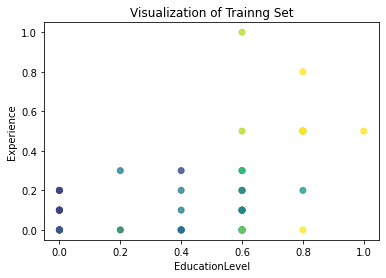

K = 1 , Accuracy:  0.7142857142857143 , Precision:  0.7142857142857143 , Recall:  0.7142857142857143
K = 3 , Accuracy:  0.8571428571428571 , Precision:  0.8571428571428571 , Recall:  0.8571428571428571
K = 5 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 7 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 9 , Accuracy:  0.9285714285714286 , Precision:  0.9285714285714286 , Recall:  0.9285714285714286
K = 11 , Accuracy:  0.7857142857142857 , Precision:  0.7857142857142857 , Recall:  0.7857142857142857
K = 13 , Accuracy:  0.42857142857142855 , Precision:  0.42857142857142855 , Recall:  0.42857142857142855
K = 15 , Accuracy:  0.2857142857142857 , Precision:  0.2857142857142857 , Recall:  0.2857142857142857
K = 17 , Accuracy:  0.2857142857142857 , Precision:  0.2857142857142857 , Recall:  0.2857142857142857
K = 19 , Accuracy:  0.2857142857142857 , Precision:  0.2857142857142857 , Recall:  0.2857142857142857
K = 21 , Accuracy:  0.2857142857142857 , Precision:  0.2857142857142857 

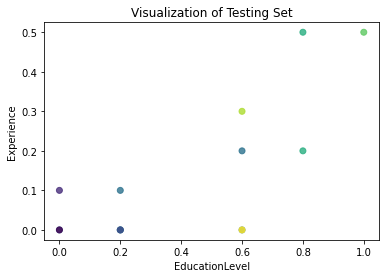

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 1 , Accuracy:  0.3164835164835165
K = 3 , Accuracy:  0.3351648351648352


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 5 , Accuracy:  0.4417582417582418


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 7 , Accuracy:  0.3505494505494505
K = 9 , Accuracy:  0.3802197802197802


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 11 , Accuracy:  0.41208791208791207


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 13 , Accuracy:  0.3802197802197802
K = 15 , Accuracy:  0.40989010989010993


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 17 , Accuracy:  0.39450549450549455


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


K = 19 , Accuracy:  0.3043956043956044


In [44]:
x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)


# Visualize train set
plt.figure(1)
plt.scatter(x_train['EducationLevel'], x_train['Experience'], c=y_train, alpha = 0.8)
plt.xlabel('EducationLevel')
plt.ylabel('Experience')
plt.title('Visualization of Trainng Set')
plt.show()
plt.close()

# build and eval models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


for k in range(1, 24, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))
    
# Visualize the best model on the test set
clf=neighbors.KNeighborsClassifier(1, weights='uniform')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plt.figure(2)
plt.scatter(x_test['EducationLevel'], x_test['Experience'], c=y_pred, alpha = 0.8)
plt.xlabel('EducationLevel')
plt.ylabel('Experience')
plt.title('Visualization of Testing Set')
plt.show()
plt.close()


# By N-fold cross evaluations ###############################################
from sklearn.model_selection import cross_val_score

for k in range(1, 20, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

In [45]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [103]:
#svm
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=df_knn.drop('PG',axis=1)
y=df_knn['PG']

clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)
clf=SVC(kernel='rbf', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  0.9285714285714286


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy by N-fold Cross Validation: 0.48461538461538456
Accuracy by N-fold Cross Validation: 0.3934065934065934


In [102]:
#feature reduction SVM
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(df_knn)
X_selected = X_pca[:,:2]
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)


Accuracy by hold-out evaluation:  0.8571428571428571


In [83]:
#logistic
df=df.drop(["JobFamilyDescription","JobClass","JobClassDescription"],axis=1) #removing unwanted features
df


,JobFamily,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,5,3,1,3,4,3,5,PG05
1,1,6,4,1,4,5,7,7,PG06
2,1,8,4,2,5,6,7,10,PG08
3,1,10,5,5,6,7,8,11,PG10
4,2,1,1,0,1,1,1,1,PG01
...,...,...,...,...,...,...,...,...,...
61,15,3,1,1,2,1,1,1,PG03
62,15,5,4,1,3,4,3,4,PG05
63,15,6,5,2,4,5,7,5,PG06
64,15,8,5,5,5,6,7,7,PG08


In [84]:
df_raw=df.copy(deep=True) 
df_log=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_log[['PG']])
# add them to dataframe
df_log=df_log.join(df_dummies)
# drop original columns
df_log=df_log.drop('PG',axis=1)

display(HTML(df_log.head(10).to_html()))

,JobFamily,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG_PG01,PG_PG02,PG_PG03,PG_PG04,PG_PG05,PG_PG06,PG_PG07,PG_PG08,PG_PG09,PG_PG10
0,1,5,3,1,3,4,3,5,0,0,0,0,1,0,0,0,0,0
1,1,6,4,1,4,5,7,7,0,0,0,0,0,1,0,0,0,0
2,1,8,4,2,5,6,7,10,0,0,0,0,0,0,0,1,0,0
3,1,10,5,5,6,7,8,11,0,0,0,0,0,0,0,0,0,1
4,2,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0
5,2,2,1,1,1,1,2,3,0,1,0,0,0,0,0,0,0,0
6,2,3,1,2,2,1,3,3,0,0,1,0,0,0,0,0,0,0
7,2,4,4,0,2,1,3,5,0,0,0,1,0,0,0,0,0,0
8,2,5,4,0,3,5,7,7,0,0,0,0,1,0,0,0,0,0
9,3,4,2,0,4,1,1,2,0,0,0,1,0,0,0,0,0,0


In [88]:

import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_log, y_encoded, test_size=0.2)
clf=LogisticRegression()
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)


# by N-fold cross validation
clf=LogisticRegression()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy by hold-out evaluation:  0.6428571428571429
Accuracy by N-fold Cross Validation: 0.3032967032967033


In [20]:
from sklearn.neural_network import MLPClassifier

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=df_knn.drop('PG',axis=1)
y=df_knn['PG']
# by N-fold cross validation
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=1)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy by hold-out evaluation:  0.6428571428571429


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Accuracy by N-fold Cross Validation: 0.24395604395604392


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
# 03. Naive Bayes Classifier ################################################################################
# Requirements: 1). nominal features; 2). assumption of conditionally indepenence
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# Pre-processing ###############################################
print('Column data types:\n',df_raw.dtypes)
df_nb=df_raw.copy(deep=True)

# convert numerical to categorical data, e.g., Age #################################
df_nb['JobFamily'] = pd.cut(df_nb['JobFamily'],2)
df_nb['JobClass'] = pd.cut(df_nb['JobClass'],3)
df_nb['PayGrade'] = pd.cut(df_nb['PayGrade'],3)
df_nb['EducationLevel'] = pd.cut(df_nb['EducationLevel'],3)

df_nb['ProblemSolving'] = pd.cut(df_nb['ProblemSolving'],3)
df_nb['Supervision'] = pd.cut(df_nb['Supervision'],3)
df_nb['ContactLevel'] = pd.cut(df_nb['ContactLevel'],3)
df_nb['FinancialBudget'] = pd.cut(df_nb['FinancialBudget'],3)

display('Data Example',HTML(df_nb.head(5).to_html()))

# by hold-out evaluation ###########################################################
y=df_nb['PG']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

# transform categorical data to numerical data, i.e., one-hot encoding
print(df_nb.dtypes)
df_nb=pd.get_dummies(df_nb.drop('PG',axis=1))
df_nb['PG']=y_encoded
display(HTML(df_nb.head(5).to_html()))

# API for GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y_pred,y_test))

# by N-fold evaluation ###########################################################
y=df_nb['PG']
x=df_nb.drop('PG',axis=1)
clf = GaussianNB()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Column data types:
 JobFamily                int64
JobFamilyDescription    object
JobClass                 int64
JobClassDescription     object
PayGrade                 int64
EducationLevel           int64
Experience               int64
ProblemSolving           int64
Supervision              int64
ContactLevel             int64
FinancialBudget          int64
PG                      object
dtype: object


'Data Example'

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant I,"(4.0, 7.0]","(2.667, 4.333]",1,"(2.667, 4.333]","(3.0, 5.0]","(0.993, 3.333]","(4.333, 7.667]",PG05
1,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant II,"(4.0, 7.0]","(2.667, 4.333]",1,"(2.667, 4.333]","(3.0, 5.0]","(5.667, 8.0]","(4.333, 7.667]",PG06
2,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant III,"(7.0, 10.0]","(2.667, 4.333]",2,"(4.333, 6.0]","(5.0, 7.0]","(5.667, 8.0]","(7.667, 11.0]",PG08
3,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant IV,"(7.0, 10.0]","(4.333, 6.0]",5,"(4.333, 6.0]","(5.0, 7.0]","(5.667, 8.0]","(7.667, 11.0]",PG10
4,"(0.986, 8.0]",Administrative Support,"(0.935, 22.667]",Admin Support I,"(0.991, 4.0]","(0.995, 2.667]",0,"(0.995, 2.667]","(0.994, 3.0]","(0.993, 3.333]","(0.99, 4.333]",PG01


JobFamily               category
JobFamilyDescription      object
JobClass                category
JobClassDescription       object
PayGrade                category
EducationLevel          category
Experience                 int64
ProblemSolving          category
Supervision             category
ContactLevel            category
FinancialBudget         category
PG                        object
dtype: object


,Experience,"JobFamily_(0.986, 8.0]","JobFamily_(8.0, 15.0]",JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,"JobClass_(0.935, 22.667]","JobClass_(22.667, 44.333]","JobClass_(44.333, 66.0]",JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,"PayGrade_(0.991, 4.0]","PayGrade_(4.0, 7.0]","PayGrade_(7.0, 10.0]","EducationLevel_(0.995, 2.667]","EducationLevel_(2.667, 4.333]","EducationLevel_(4.333, 6.0]","ProblemSolving_(0.995, 2.667]","ProblemSolving_(2.667, 4.333]","ProblemSolving_(4.333, 6.0]","Supervision_(0.994, 3.0]","Supervision_(3.0, 5.0]","Supervision_(5.0, 7.0]","ContactLevel_(0.993, 3.333]","ContactLevel_(3.333, 5.667]","ContactLevel_(5.667, 8.0]","FinancialBudget_(0.99, 4.333]","FinancialBudget_(4.333, 7.667]","FinancialBudget_(7.667, 11.0]",PG
0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,4
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,

Accuracy by Hold-out Eval: 0.7857142857142857


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy by N-fold Cross Validation: 0.5945054945054945


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# API for DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier() # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)

# by N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)

# Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

Tree Accuracy by hold-out evaluation:  0.7857142857142857


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Tree Accuracy by N-fold Cross Validation: 0.9549450549450549


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomForest Accuracy by N-fold Cross Validation: 0.9703296703296704
